# Analyzing the Cyclisti Ride-share Refined Trip Dataset Using Python

Python was used to further analyze the Cyclistic dataset, with pandas for data manipulation and Matplotlib for visualization. Group-by operations were applied to compare ride duration, frequency, and temporal usage patterns between casual riders and annual members. The Python analysis confirmed trends observed in SQL and BI tools, reinforcing conclusions around commuting versus leisure behavior.

In [1]:
import pandas as pd
import numpy as np

ride_share = pd.read_csv("/kaggle/input/cyclistic-ride-share-enriched/cyclistic_trips_enriched.csv")

In [2]:
ride_share.head()

,ride_id,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,ride_length_minutes,day_of_week_num,day_of_week_name,start_hour
0,21755306,2019-01-03 20:40:05 UTC,2019-01-03 20:49:44 UTC,Broadway & Thorndale Ave,458,2112 W Peterson Ave,456,member,9,5,Thursday,20
1,21755590,2019-01-04 03:24:28 UTC,2019-01-04 03:39:29 UTC,Warren Park West,450,2112 W Peterson Ave,456,member,15,6,Friday,3
2,21758497,2019-01-04 12:31:59 UTC,2019-01-04 12:39:50 UTC,2112 W Peterson Ave,456,2112 W Peterson Ave,456,casual,7,6,Friday,12
3,21763391,2019-01-05 03:21:17 UTC,2019-01-05 03:38:34 UTC,Western Ave & Lunt Ave,467,2112 W Peterson Ave,456,member,17,7,Saturday,3
4,21769120,2019-01-05 17:54:34 UTC,2019-01-05 18:20:38 UTC,Clarendon Ave & Gordon Ter,312,2112 W Peterson Ave,456,member,26,7,Saturday,17


In [3]:
ride_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791237 entries, 0 to 791236
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ride_id              791237 non-null  object
 1   started_at           791237 non-null  object
 2   ended_at             791237 non-null  object
 3   start_station_name   791237 non-null  object
 4   start_station_id     791237 non-null  int64 
 5   end_station_name     791237 non-null  object
 6   end_station_id       791237 non-null  int64 
 7   member_casual        791237 non-null  object
 8   ride_length_minutes  791237 non-null  int64 
 9   day_of_week_num      791237 non-null  int64 
 10  day_of_week_name     791237 non-null  object
 11  start_hour           791237 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 72.4+ MB


In [4]:
print("\nMissing values")
print(ride_share.isna().sum())


Missing values
ride_id                0
started_at             0
ended_at               0
start_station_name     0
start_station_id       0
end_station_name       0
end_station_id         0
member_casual          0
ride_length_minutes    0
day_of_week_num        0
day_of_week_name       0
start_hour             0
dtype: int64


Checking frequency of the rider type

In [5]:
ride_share = ride_share[ride_share["ride_length_minutes"] > 0]

ride_share["member_casual"].value_counts()

member_casual
member    716502
casual     67274
Name: count, dtype: int64

# Average Ride Length between Member and Casual Riders

In [6]:
avg_ride_length = (
    ride_share.groupby("member_casual")["ride_length_minutes"]
    .mean()
    .round(2)
)

avg_ride_length


member_casual
casual    95.20
member    13.54
Name: ride_length_minutes, dtype: float64

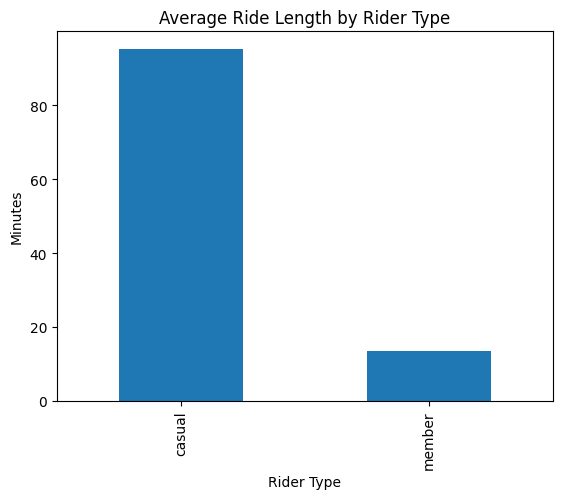

In [7]:
import matplotlib.pyplot as plt

avg_ride_length.plot(kind="bar")
plt.title("Average Ride Length by Rider Type")
plt.ylabel("Minutes")
plt.xlabel("Rider Type")
plt.show()


Casual riders have a higher average ride length than members.

# Number of Rides by Day of Week (Grouped by Rider Type)

In [8]:
weekday_order = [
    "Sunday", "Monday", "Tuesday", "Wednesday",
    "Thursday", "Friday", "Saturday"
]

ride_share["day_of_week_name"] = pd.Categorical(
    ride_share["day_of_week_name"],
    categories=weekday_order,
    ordered=True
)

#...Group and Count
rides_by_day = (
    ride_share.groupby(["day_of_week_name", "member_casual"])
    .size()
    .unstack()
)

rides_by_day


/tmp/ipykernel_17/1758089220.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ride_share.groupby(["day_of_week_name", "member_casual"])


member_casual,casual,member
day_of_week_name,,
Sunday,18452,59709
Monday,5547,109859
Tuesday,7250,127373
Wednesday,7588,121313
Thursday,7087,124589
Friday,7951,114607
Saturday,13399,59052


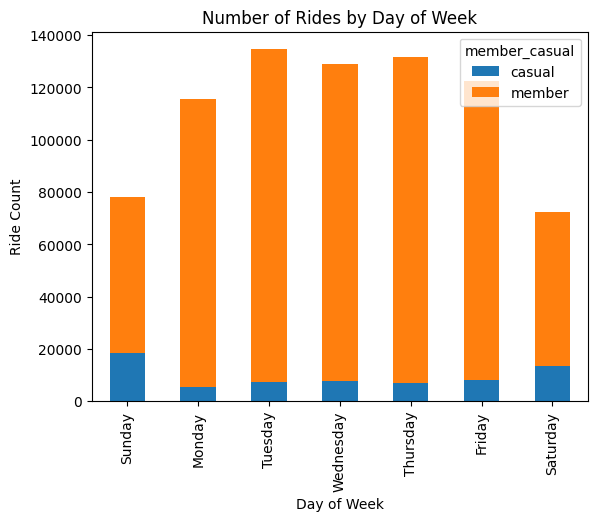

In [9]:
rides_by_day.plot(kind="bar", stacked=True)
plt.title("Number of Rides by Day of Week")
plt.ylabel("Ride Count")
plt.xlabel("Day of Week")
plt.show()


# Ride Volume by Hour of Day

In [10]:
rides_by_hour = (
    ride_share.groupby(["start_hour", "member_casual"])
    .size()
    .unstack()
)

rides_by_hour.head()


member_casual,casual,member
start_hour,,
0,2244,5121
1,5005,19708
2,5410,18328
3,5224,23740
4,5148,41203


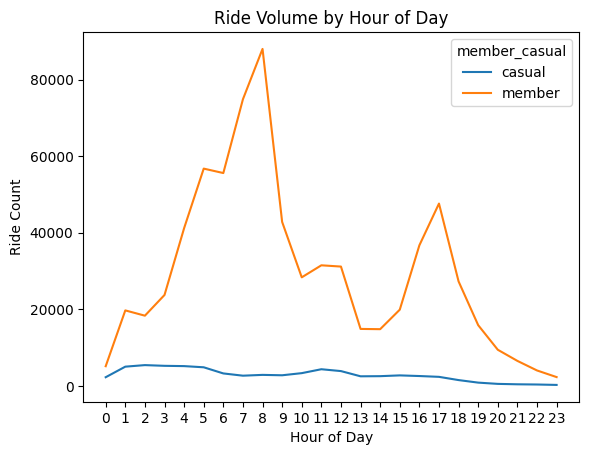

In [11]:
rides_by_hour.plot(kind="line")
plt.title("Ride Volume by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Ride Count")
plt.xticks(range(0, 24))
plt.show()


# Summary Table for Reporting

Members peak during commute hours (AM/PM) and Casual riders peak by mid-day

In [12]:
summary = ride_share.groupby("member_casual").agg(
    total_rides=("ride_id", "count"),
    avg_ride_length=("ride_length_minutes", "mean"),
    max_ride_length=("ride_length_minutes", "max"),
    min_ride_length=("ride_length_minutes", "min")
).round(2)

summary


,total_rides,avg_ride_length,max_ride_length,min_ride_length
member_casual,,,,
casual,67274,95.20,177200,1
member,716502,13.54,101607,1


# End!